# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri. Dataset yang digunakan dalam proyek ini adalah https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1021]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [1022]:
file_path = "bank_transactions.csv"

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [1023]:
# 1. Memahami Struktur Data

# Tinjau jumlah baris dan kolom
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

# Tinjau tipe data setiap kolom
print(df.info())

# Tinjau 5 data pertama
print(df.head())

print(df.describe())

Dataset memiliki 2512 baris dan 16 kolom.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-nu

In [1024]:
# 2. Menangani Data yang Hilang

# Cek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print("Missing values:\n", df.isnull().sum())

# Menampilkan hanya kolom yang memiliki missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

Missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
Series([], dtype: int64)


In [1025]:
# Menampilkan jumlah data yang duplikat
duplicate_rows = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_rows}")

Jumlah data duplikat: 0


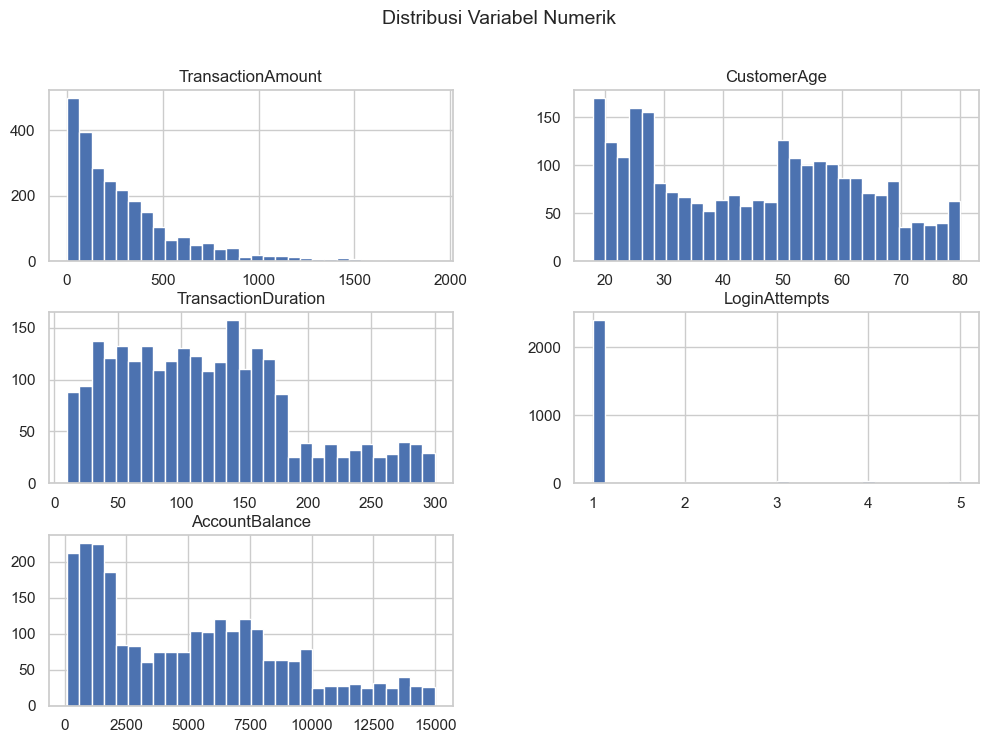

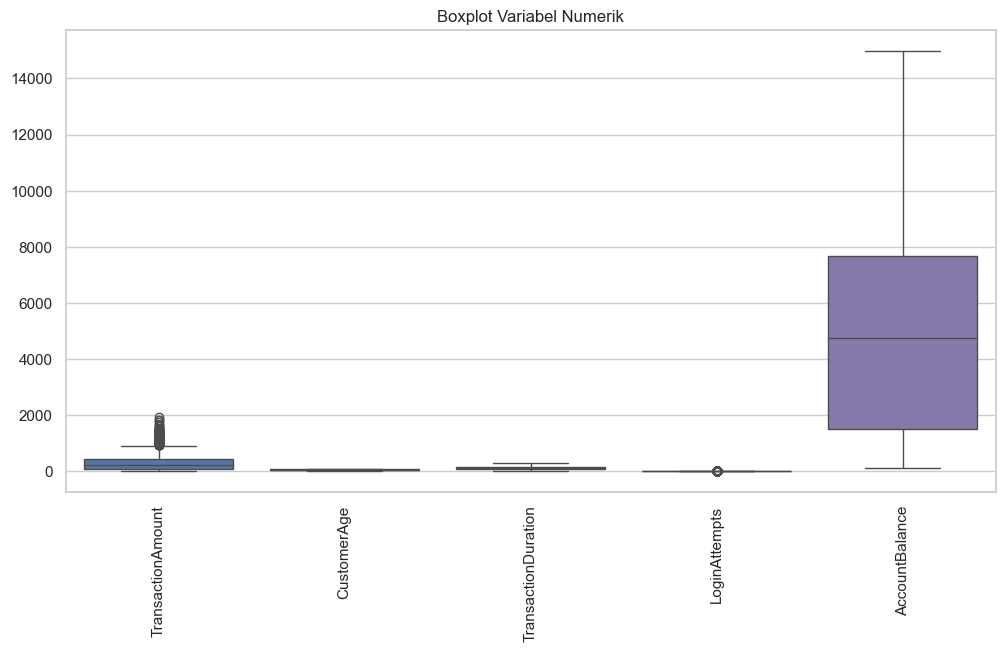

In [1026]:
# 3. Analisis Distribusi dan Korelasi
#    a. Visualisasi Distribusi Variabel Numerik (Histogram & Boxplot)

# Histogram untuk melihat distribusi
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

# Boxplot untuk melihat outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot Variabel Numerik")
plt.show()

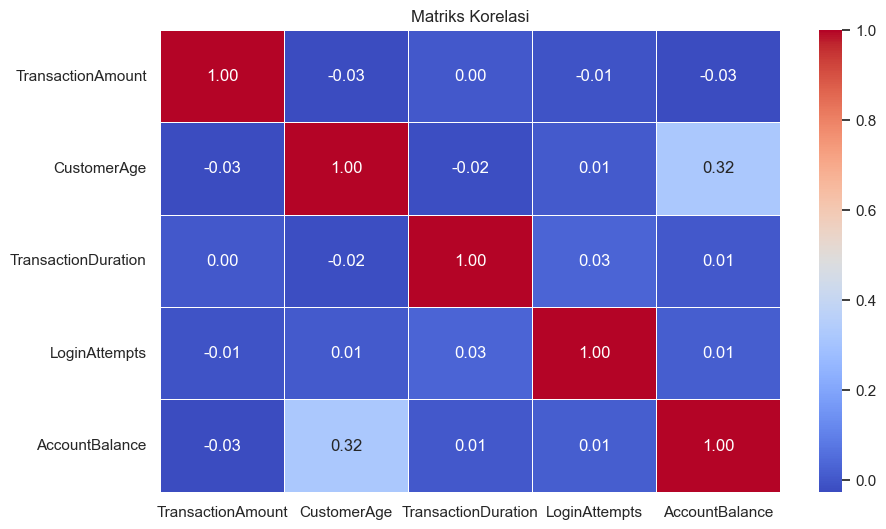

In [1027]:
#    b. Matriks Korelasi antara Variabel Numerik
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Cek apakah ada kolom numerik
if df_numeric.shape[1] > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Matriks Korelasi")
    plt.show()
else:
    print("Tidak ada cukup kolom numerik untuk menghitung korelasi.")


C:\Users\Rizka Nandya Septian\AppData\Local\Temp\ipykernel_2936\3152265600.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')


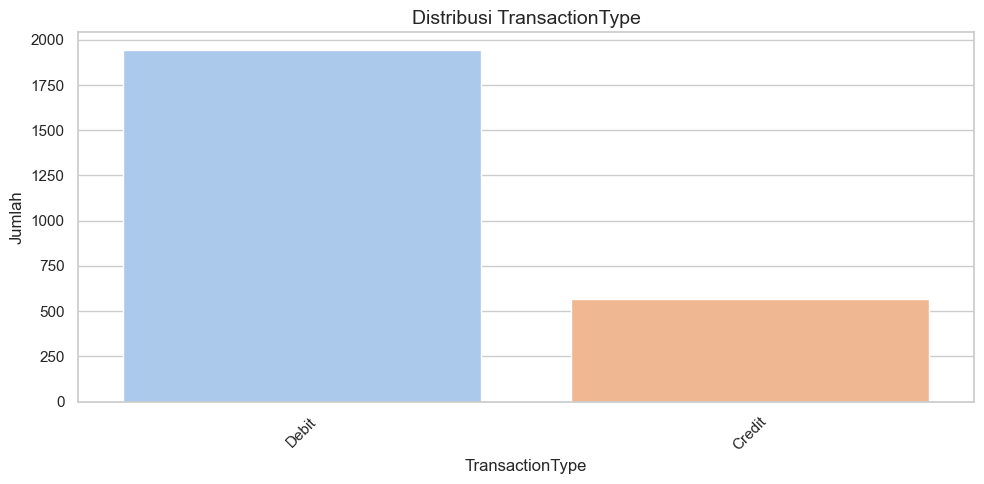

C:\Users\Rizka Nandya Septian\AppData\Local\Temp\ipykernel_2936\3152265600.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')


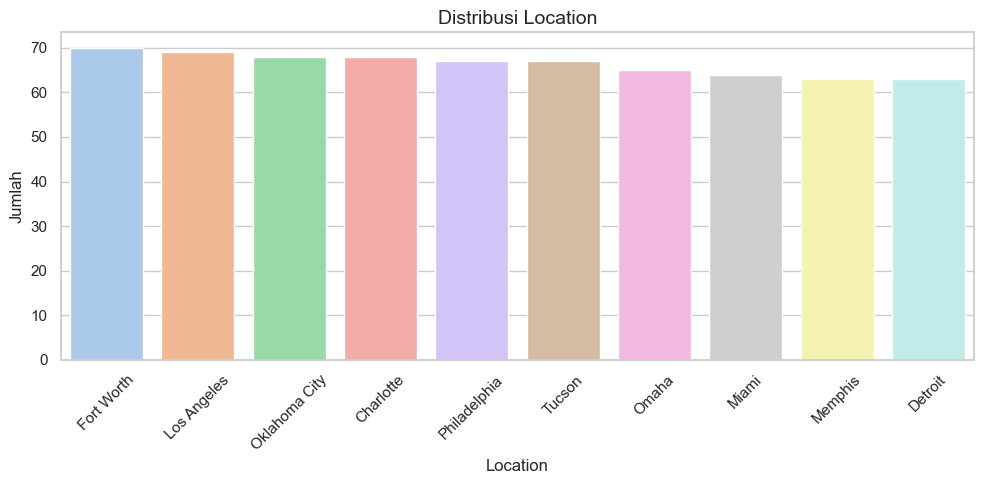

C:\Users\Rizka Nandya Septian\AppData\Local\Temp\ipykernel_2936\3152265600.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')


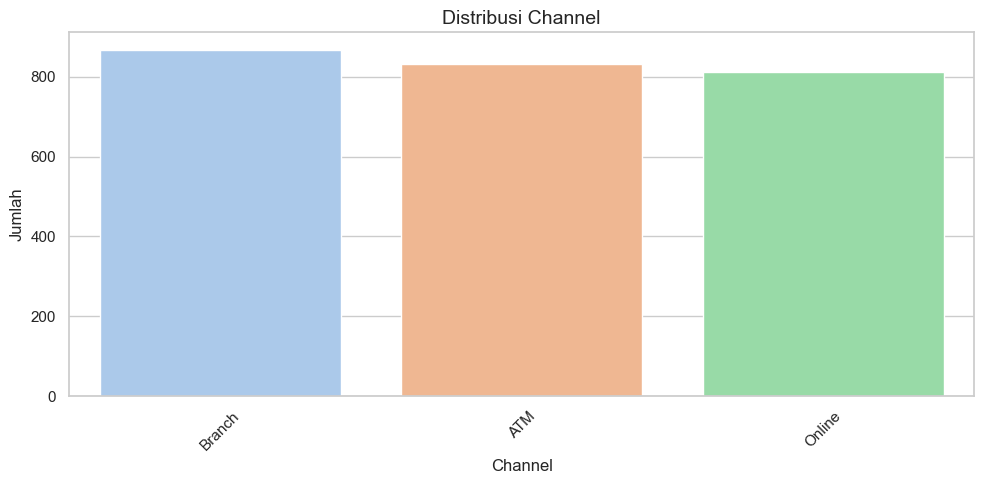

C:\Users\Rizka Nandya Septian\AppData\Local\Temp\ipykernel_2936\3152265600.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')


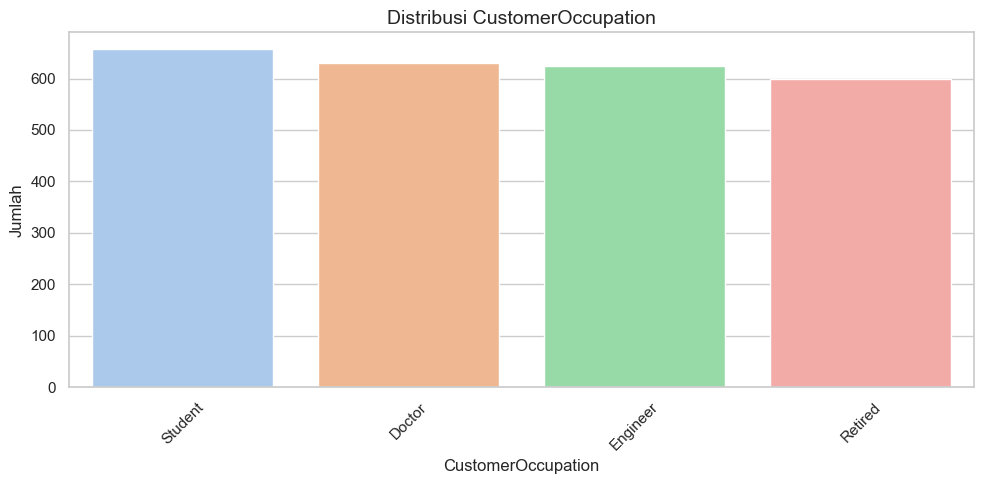

In [1028]:
# 4. Visualisasi Data
#    a. Diagram Batang untuk Variabel Kategorikal

# Konfigurasi tampilan
sns.set(style="whitegrid")

# Tentukan kolom kategorikal dari dataset
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Menampilkan diagram batang
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    
    # Hitung frekuensi dan ambil 10 teratas
    top_categories = df[col].value_counts().nlargest(10)
    
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


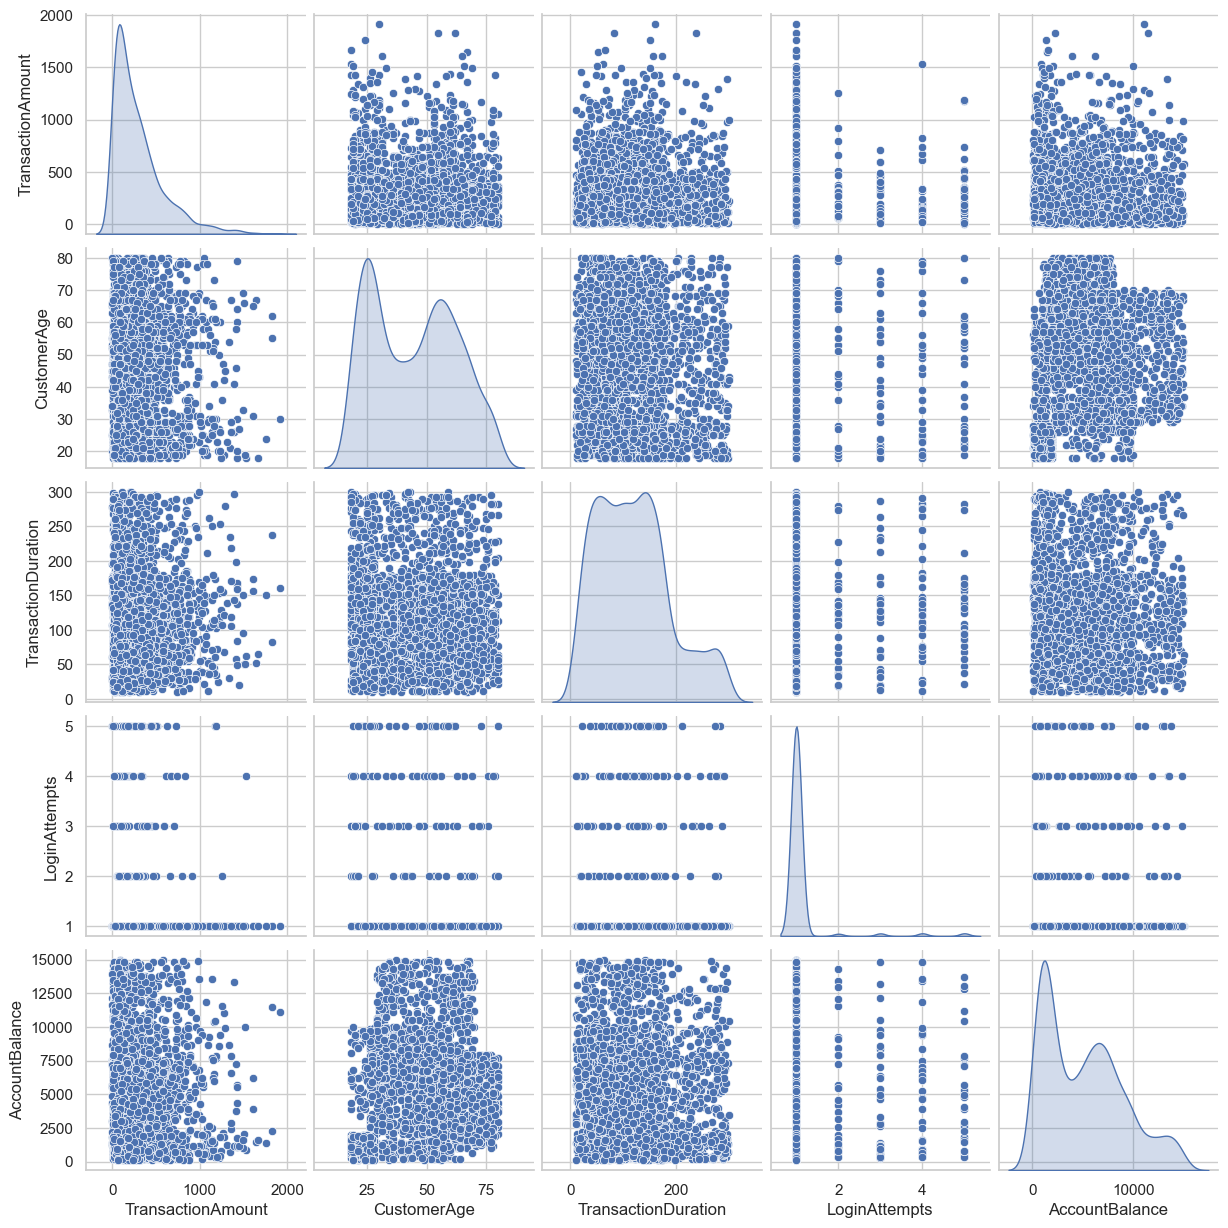

In [1029]:
#    b. Pairplot untuk Melihat Hubungan Antar Variabel

# Visualisasi Pairplot
sns.pairplot(df, diag_kind="kde", corner=False)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [1030]:
# 1. Menghapus Data yang Tidak Relevan
drop_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate']
df = df.drop(columns=drop_columns, errors='ignore')

df.head(10)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40
5,92.15,Debit,Oklahoma City,ATM,18,Student,172,1,781.68
6,7.08,Credit,Seattle,ATM,37,Doctor,139,1,13316.71
7,171.42,Credit,Indianapolis,Branch,67,Retired,291,1,2796.24
8,106.23,Credit,Detroit,Branch,51,Engineer,86,1,9095.14
9,815.96,Debit,Nashville,ATM,55,Doctor,120,1,1021.88


*Pada tahap Exploratory Data Analysis, dalam dataset yang digunakan tidak ditemukan data yang hilang dan duplikat maka proses menangani missing value dan menghapus data duplikat tidak dilakukan.*

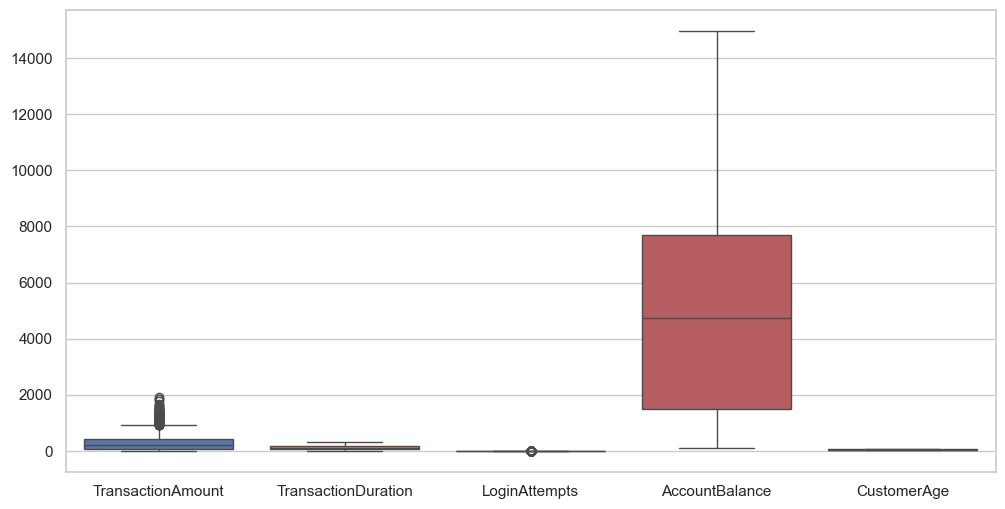

In [1031]:
# 2. Menangani Outlier

# Pilih hanya kolom numerik
num_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Hitung Q1 (Kuartil pertama) dan Q3 (Kuartil ketiga)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data dalam rentang normal (di dalam IQR)
df_filtered = df[(df[num_cols] >= lower_bound) & (df[num_cols] <= upper_bound)]

# Hapus baris yang memiliki nilai outlier
df_filtered.dropna(inplace=True)

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']])
plt.show()

In [1032]:
# 3. Encoding Kolom Kategorikal

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head(10)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70,0,81,1,5112.21
1,376.24,1,15,0,68,0,141,1,13758.91
2,126.29,1,23,2,19,3,56,1,1122.35
3,184.50,1,33,2,26,3,25,1,8569.06
4,13.45,0,1,2,26,3,198,1,7429.40
5,92.15,1,28,0,18,3,172,1,781.68
6,7.08,0,39,0,37,0,139,1,13316.71
7,171.42,0,16,1,67,2,291,1,2796.24
8,106.23,0,11,1,51,1,86,1,9095.14
9,815.96,1,26,0,55,0,120,1,1021.88


In [1033]:
# 4. Normalisasi Kolom Numerik

# Pilih kolom numerik kontinu untuk normalisasi
to_normalize = ['TransactionAmount', 'TransactionDuration', 'AccountBalance']

# Gunakan MinMaxScaler untuk normalisasi
scaler = MinMaxScaler()
df[to_normalize] = scaler.fit_transform(df[to_normalize])

# Cek hasil
df.head(10)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,70,0,0.244828,1,0.336832
1,0.195940,1,15,0,68,0,0.451724,1,0.918055
2,0.065680,1,23,2,19,3,0.158621,1,0.068637
3,0.096016,1,33,2,26,3,0.051724,1,0.569198
4,0.006874,0,1,2,26,3,0.648276,1,0.492591
5,0.047888,1,28,0,18,3,0.558621,1,0.045738
6,0.003554,0,39,0,37,0,0.444828,1,0.888330
7,0.089199,0,16,1,67,2,0.968966,1,0.181155
8,0.055226,0,11,1,51,1,0.262069,1,0.604561
9,0.425098,1,26,0,55,0,0.379310,1,0.061884


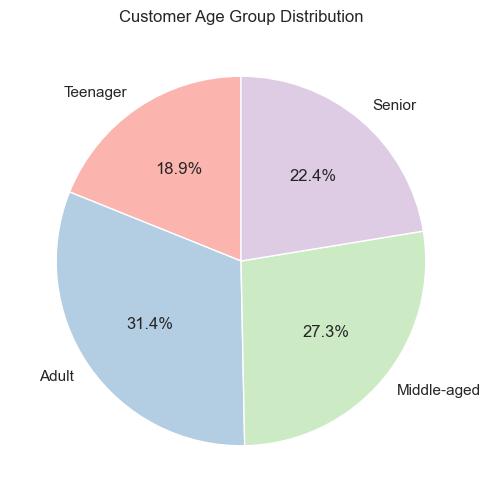

In [1034]:
# 5. Pengelompokkan Data berdasarkan Usia

# Binning berdasarkan CustomerAge (nilai asli)
bins_age = [0, 25, 45, 60, 100]
labels_age = ['Teenager', 'Adult', 'Middle-aged', 'Senior']

df['CustomerAgeGroup'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# Hitung jumlah tiap kelompok usia
age_counts = df['CustomerAgeGroup'].value_counts().sort_index()

# Buat Pie Chart
plt.figure(figsize=(6,6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Customer Age Group Distribution')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [1035]:
# Memilih Fitur untuk Clustering
selected_features = ['TransactionAmount', 'TransactionDuration', 'TransactionType', 'CustomerAge', 'AccountBalance']
X = df[selected_features]

# Evaluasi untuk range k
inertia = []
silhouette_scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

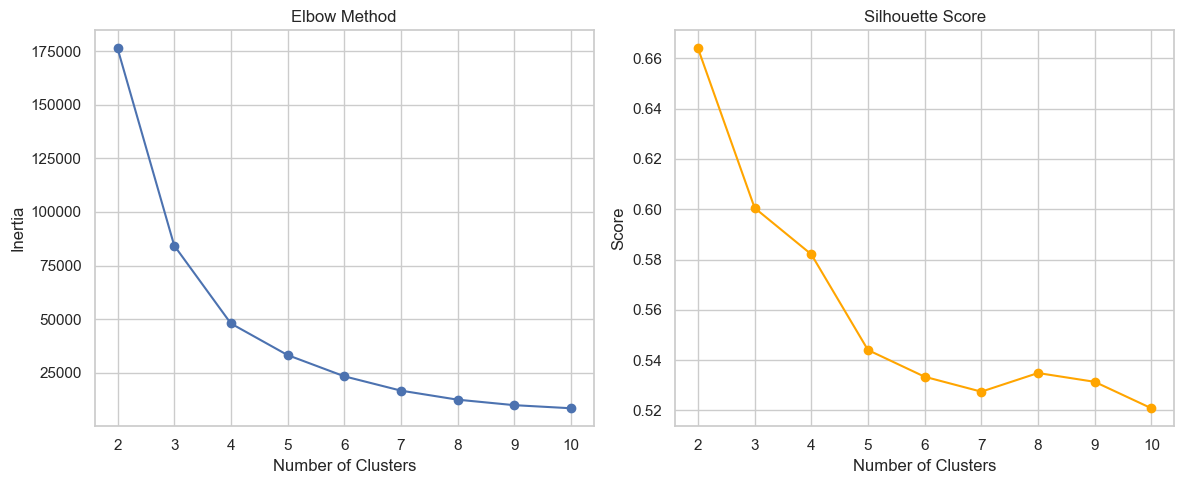

Silhouette Score Tertinggi: 0.6640
Jumlah Cluster Optimal berdasarkan Silhouette Score: 2


In [1036]:
# Menentukan jumlah cluster optimal
optimal_k = range_k[silhouette_scores.index(max(silhouette_scores))]
best_silhouette_score = max(silhouette_scores)

# Visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_k, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range_k, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

# Output hasil evaluasi
print(f"Silhouette Score Tertinggi: {best_silhouette_score:.4f}")
print(f"Jumlah Cluster Optimal berdasarkan Silhouette Score: {optimal_k}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

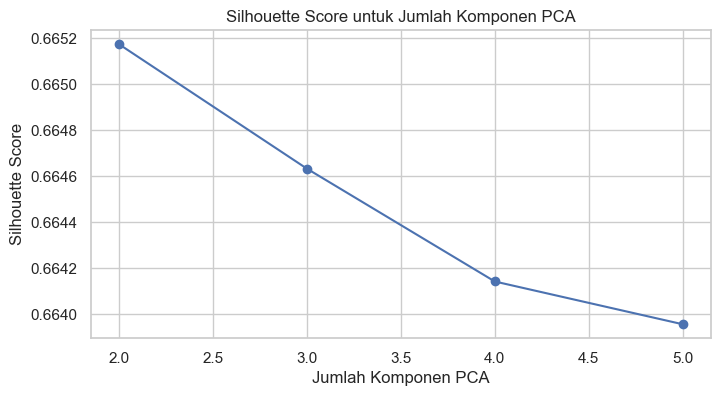

Jumlah Komponen PCA Optimal: 2
Silhouette Score Tertinggi dengan PCA: 0.6652


In [1037]:
# 1. Memilih fitur
selected_features = ['TransactionAmount', 'TransactionDuration', 'TransactionType', 'CustomerAge', 'AccountBalance']
X = df[selected_features]

# 2. Terapkan PCA (uji untuk beberapa jumlah komponen)
pca_scores = []
components_range = range(2, len(selected_features) + 1)  # dari 2 sampai jumlah fitur

for n_components in components_range:
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X)

    # Clustering dengan KMeans (jumlah cluster optimal dari sebelumnya = 2)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)

    # Evaluasi dengan Silhouette Score
    score = silhouette_score(X_pca, labels)
    pca_scores.append(score)

# 3. Visualisasi Silhouette Score untuk tiap jumlah komponen
plt.figure(figsize=(8, 4))
plt.plot(components_range, pca_scores, marker='o')
plt.title("Silhouette Score untuk Jumlah Komponen PCA")
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# 4. Menampilkan hasil terbaik
best_n = components_range[pca_scores.index(max(pca_scores))]
best_score = max(pca_scores)

print(f"Jumlah Komponen PCA Optimal: {best_n}")
print(f"Silhouette Score Tertinggi dengan PCA: {best_score:.4f}")

1. Sebelum dilakukan feature selection dengan PCA didapat hasil **Jumlah Cluster Optimal adalah 2** dan **Silhouette Score adalah 0.6640**.
2. Setelah dilakukan feature selection dengan PCA didapat hasil **Jumlah Cluster Optimal adalah 2** dan **Silhouette Score adalah 0.6652**.

- Didapat hasil yang tidak begitu jauh perbedaannya.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

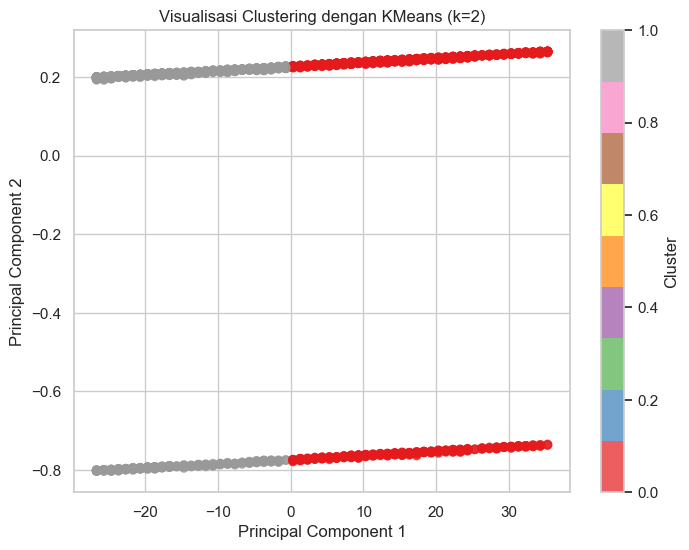

In [1038]:
# 1. Siapkan data
X = df[selected_features]

# 2. Lakukan PCA menjadi 2 dimensi untuk visualisasi
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# 3. Clustering ulang dengan optimal_k cluster
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# 4. Visualisasikan hasil clustering di 2D space
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Set1', alpha=0.7)
plt.title(f"Visualisasi Clustering dengan KMeans (k={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [1039]:
df['Cluster']=kmeans.labels_
df.head(10)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAgeGroup,Cluster
0,0.007207,1,36,0,70,0,0.244828,1,0.336832,Senior,0
1,0.195940,1,15,0,68,0,0.451724,1,0.918055,Senior,0
2,0.065680,1,23,2,19,3,0.158621,1,0.068637,Teenager,1
3,0.096016,1,33,2,26,3,0.051724,1,0.569198,Adult,1
4,0.006874,0,1,2,26,3,0.648276,1,0.492591,Adult,1
5,0.047888,1,28,0,18,3,0.558621,1,0.045738,Teenager,1
6,0.003554,0,39,0,37,0,0.444828,1,0.888330,Adult,1
7,0.089199,0,16,1,67,2,0.968966,1,0.181155,Senior,0
8,0.055226,0,11,1,51,1,0.262069,1,0.604561,Middle-aged,0
9,0.425098,1,26,0,55,0,0.379310,1,0.061884,Middle-aged,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [1040]:
# 1. Inverse transform fitur yang di-encode
for col in label_encoders:
    df[col] = label_encoders[col].inverse_transform(df[col])

# 2. Inverse transform fitur yang dinormalisasi
df[to_normalize] = scaler.inverse_transform(df[to_normalize])

df.head(10)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAgeGroup,Cluster
0,14.09,Debit,San Diego,ATM,70,Doctor,81.0,1,5112.21,Senior,0
1,376.24,Debit,Houston,ATM,68,Doctor,141.0,1,13758.91,Senior,0
2,126.29,Debit,Mesa,Online,19,Student,56.0,1,1122.35,Teenager,1
3,184.50,Debit,Raleigh,Online,26,Student,25.0,1,8569.06,Adult,1
4,13.45,Credit,Atlanta,Online,26,Student,198.0,1,7429.40,Adult,1
5,92.15,Debit,Oklahoma City,ATM,18,Student,172.0,1,781.68,Teenager,1
6,7.08,Credit,Seattle,ATM,37,Doctor,139.0,1,13316.71,Adult,1
7,171.42,Credit,Indianapolis,Branch,67,Retired,291.0,1,2796.24,Senior,0
8,106.23,Credit,Detroit,Branch,51,Engineer,86.0,1,9095.14,Middle-aged,0
9,815.96,Debit,Nashville,ATM,55,Doctor,120.0,1,1021.88,Middle-aged,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [1041]:
# Daftar fitur numerik dan kategorikal
numeric_features = ['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'AccountBalance']
categorical_features = ['TransactionType']

# Definisikan agregasi
agg_dict = {
    'TransactionAmount': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'TransactionType': lambda x: x.mode()[0]  # modus untuk kategorikal
}

# Hitung agregasi per cluster
cluster_summary = df.groupby('Cluster').agg(agg_dict)

# Tampilkan hasil
print("Karakteristik Tiap Cluster:\n")
print(cluster_summary)

Karakteristik Tiap Cluster:

        TransactionAmount                TransactionDuration               \
                     mean   min      max                mean   min    max   
Cluster                                                                     
0              289.490173  0.84  1831.02          118.862637  10.0  299.0   
1              305.933029  0.26  1919.11          120.446688  10.0  300.0   

        CustomerAge         AccountBalance                   TransactionType  
               mean min max           mean     min       max        <lambda>  
Cluster                                                                       
0         60.153846  45  80    6082.099521  120.89  14942.78           Debit  
1         28.743942  18  44    4118.363700  101.25  14977.99           Debit  


Tulis hasil interpretasinya di sini.
1. *Cluster 1*: Cluster ini merepresentasikan **pelanggan berusia lebih tua**, dengan kondisi **finansial yang stabil**, ditandai dengan saldo akun yang tinggi. Meskipun mereka tidak terlalu aktif dalam transaksi, mereka kemungkinan memiliki daya beli yang besar dan merupakan pelanggan yang pasif namun loyal.

2. *Cluster 2*: Cluster ini mencerminkan **kelompok pelanggan muda**, yang mungkin masih dalam tahap awal membangun finansial. Mereka cenderung **lebih aktif bertransaksi**, meskipun kapasitas **saldonya lebih kecil** dibanding pelanggan yang lebih tua. Ini bisa menjadi segmen yang potensial untuk program loyalitas atau peningkatan layanan.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
### Ciri-Ciri
- **Rata-rata usia pelanggan:** 60 tahun (rentang usia: 45–80 tahun)
- **Rata-rata saldo akun:** Rp 6.082 (min: Rp 120,89 – max: Rp 14.942)
- **Rata-rata jumlah transaksi:** Rp 289 (min: Rp 0,84 – max: Rp 1.831)
- **Durasi transaksi rata-rata:** 118 detik
- **Jenis transaksi dominan:** Debit
### Analisis 
- Kelompok pelanggan berusia lebih tua, menunjukkan pengalaman atau loyalitas terhadap layanan keuangan.
- Memiliki saldo akun yang tinggi, mencerminkan stabilitas atau kekuatan finansial.
- Jumlah transaksi tidak terlalu tinggi, yang bisa mengindikasikan bahwa mereka melakukan transaksi besar namun tidak sering, atau cenderung pasif.
- Sangat potensial untuk ditawarkan produk investasi, asuransi, atau layanan eksklusif.

## Cluster 2:
### Ciri-Ciri
- **Rata-rata usia pelanggan:** 28 tahun (rentang usia: 18–44 tahun)
- **Rata-rata saldo akun:** Rp 4.118 (min: Rp 101,25 – max: Rp 14.978)
- **Rata-rata jumlah transaksi:** Rp 305 (min: Rp 0,26 – max: Rp 1.919)
- **Durasi transaksi rata-rata:** 120 detik
- **Jenis transaksi dominan:** Debit
### Analisis 
- Kelompok pelanggan muda yang mungkin masih berada dalam tahap awal karir atau eksplorasi finansial.
- Memiliki saldo akun yang lebih rendah, tapi lebih aktif dalam bertransaksi dibandingkan Cluster 1.
- Potensial untuk dijadikan target kampanye loyalitas, cashback, atau edukasi finansial, karena mereka masih berkembang.
- Transaksi yang lebih sering menunjukkan bahwa mereka terbiasa dengan layanan digital dan mobile banking.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1042]:
# Simpan DataFrame ke CSV
df.to_csv("bank_transactions_clustering.csv", index=False)

print("Data hasil clustering telah disimpan sebagai 'bank_transactions_clustering.csv'")

Data hasil clustering telah disimpan sebagai 'bank_transactions_clustering.csv'
